In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files

In [ ]:
#https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#Implementing_K-Means_Clustering_in_Python

In [ ]:
uploaded = files.upload()
com = pd.read_excel('Errors_Multiple.xlsx', usecols='A')
df = pd.read_excel('Errors_Multiple.xlsx', usecols='B:D')
df.head()


Saving Errors_Multiple.xlsx to Errors_Multiple (1).xlsx


,MAPE,MSE,Rsque
0,0.793862,0.995128,1.28
1,0.864761,0.993304,0.53
2,0.174480,0.992033,1.77
3,5.464242,0.999047,1.72
4,1.154323,0.997777,0.83


In [ ]:
# statistics of the data
df.describe()
data = df

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2
count,4.600000e+01,4.600000e+01,4.600000e+01
mean,8.085320e-17,3.728901e-16,-9.654113e-18
std,1.011050e+00,1.011050e+00,1.011050e+00
min,-2.084351e-01,-4.778531e+00,-4.355013e-01
25%,-2.083605e-01,2.650064e-01,-3.133589e-01
50%,-2.081466e-01,3.584888e-01,-2.349307e-01
75%,-2.006783e-01,3.872342e-01,-1.509310e-01
max,6.557978e+00,4.081504e-01,6.104471e+00


In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')


In [ ]:
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
# inertia on the fitted data
kmeans.inertia_
print(kmeans.inertia_)

79.16030122278302


In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    #kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

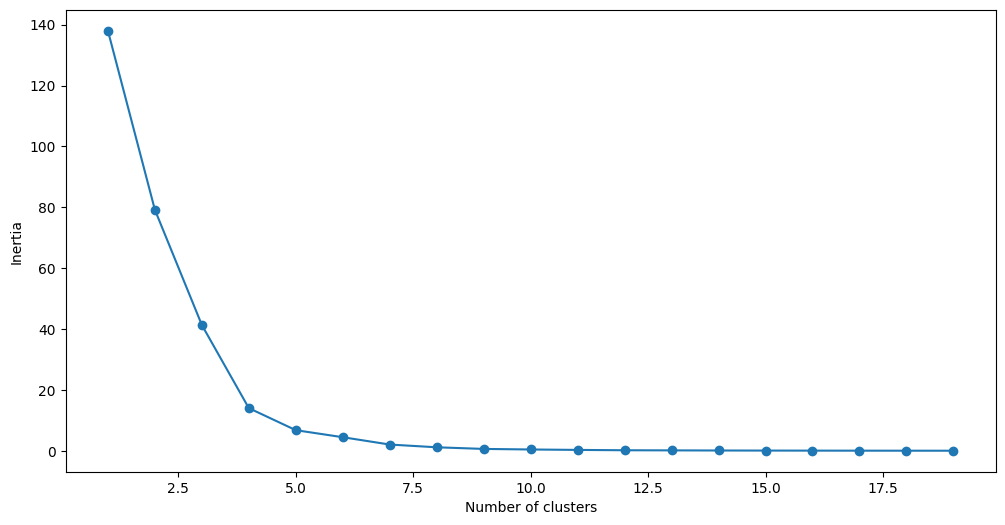

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# k means using 5 clusters and k-means++ initialization
#kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)  # You can adjust the value of n_init as needed
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


In [ ]:
frame = pd.DataFrame(data_scaled)
frame['company name'] = com
frame['cluster'] = pred
frame['cluster'].value_counts()
print(frame)

           0         1         2                   company name  cluster
0  -0.208328  0.383314 -0.306930                     LB finance        0
1  -0.208318  0.371752 -0.435501                            JKH        0
2  -0.208413  0.363694 -0.222931                     Laughs gas        0
3  -0.207687  0.408150 -0.231502                      Lanka IOC        0
4  -0.208278  0.400103 -0.384073                            HNB        0
5   0.042495  0.396640  6.104471  Hunas Falls _ Hunas Holdings         2
6  -0.208405  0.385812 -0.222931  Dankotuwa Porcelain 2022-2023        0
7  -0.208219  0.396290 -0.336073                         Heleys        0
8  -0.208363  0.369695 -0.363502                        Haycarb        0
9  -0.208152  0.333039 -0.116645                   Hapugastanna        0
10  0.767703  0.244964  0.068497                   Ceylinco Ins        0
11 -0.208141  0.342855 -0.348073          Central Finance (CFIN        0
12 -0.208208 -0.198767 -0.312073             JKL (J